In [11]:
import datetime
import tensorflow as tf
# from tensorflow.keras.callbacks import TensorBoard

type(tf.keras.callbacks.TensorBoard)

type

This code imports the `datetime` and `tensorflow` modules, and then checks the type of the `TensorBoard` class from the `tensorflow.keras.callbacks` module.

The `datetime` module provides classes for working with dates and times in Python. The `tensorflow` module is a popular open-source machine learning library developed by Google. The `TensorBoard` class is a callback function in TensorFlow that can be used to visualize the training process of a machine learning model.

The commented out line of code (`# from tensorflow.keras.callbacks import TensorBoard`) suggests that the `TensorBoard` callback may be used later in the notebook to monitor the training of a model.

The `type()` function is used to check the type of an object in Python. In this case, it is used to check the type of the `TensorBoard` class. The output of the code is the type of the `TensorBoard` class, which is `<class 'type'>`.

I hope this helps! Let me know if you have any further questions.


In [12]:
# cuDNN can sometimes fail to initialize when TF reserves all of the GPU memory
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# Load and prepare the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


This code snippet contains two parts. The first part is a comment that explains that cuDNN (a library for deep neural networks) can sometimes fail to initialize when TensorFlow reserves all of the GPU memory.

The second part of the code loads and prepares the MNIST dataset using the `tf.keras.datasets.mnist.load_data()` function. The MNIST dataset is a collection of handwritten digits that is commonly used for training and testing machine learning models.

The dataset is split into two sets: a training set (`x_train` and `y_train`) and a test set (`x_test` and `y_test`). The `x_train` and `x_test` arrays contain the images of the digits, while the `y_train` and `y_test` arrays contain the corresponding labels.

The `physical_devices` variable is used to get a list of all the available physical devices (in this case, GPUs) on the system. The `tf.config.experimental.set_memory_growth()` function is then used to set the memory growth option for the first GPU in the list to `True`. This allows TensorFlow to allocate memory on the GPU as needed, rather than reserving all of the memory at once.

The `try` and `except` statements are used to handle any errors that may occur when setting the memory growth option. If an error occurs, the `pass` statement is used to do nothing and continue with the rest of the code.


In [13]:
# print(x_train.shape)
# (60000,28,28)

# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

# print(x_train.shape)
# (60000,28,28,1)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

This code excerpt preprocesses the MNIST dataset by reshaping the input data and normalizing the pixel values. It also reserves 10,000 samples for validation.

The first two lines of code are commented out, but they show the original shape of the `x_train` array before preprocessing. The `x_train` and `x_test` arrays are then reshaped using the `reshape()` method to have a shape of `(number of samples, height, width, channels)`. In this case, the height and width are both 28, and there is only one channel (since the images are grayscale).

The `astype()` method is used to convert the `y_train` and `y_test` arrays to `float32` data type. This is necessary for compatibility with the TensorFlow library.

The last four lines of code reserve 10,000 samples from the training set for validation. The `x_val` and `y_val` arrays are created by slicing the last 10,000 samples from the `x_train` and `y_train` arrays, respectively. The remaining samples are used for training by slicing the `x_train` and `y_train` arrays up to the last 10,000 samples.


In [14]:
# Define our model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2023-10-08 09:52:12.251821: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


This code defines a convolutional neural network (CNN) model architecture using the Keras API in TensorFlow.

The `tf.keras.Sequential()` function is used to create a sequential model, which is a linear stack of layers. The layers are defined as a list of objects that are added to the model in the order they are specified.

The model architecture consists of the following layers:

- `Conv2D` layer with 6 filters, a kernel size of (3, 3), and a ReLU activation function. This layer applies 6 convolutional filters to the input image, each with a kernel size of 3x3 pixels. The ReLU activation function is used to introduce non-linearity into the model.

- `AveragePooling2D` layer. This layer applies average pooling to the output of the previous layer, which reduces the spatial dimensions of the feature maps.

- `Conv2D` layer with 16 filters, a kernel size of (3, 3), and a ReLU activation function. This layer applies 16 convolutional filters to the output of the previous layer, each with a kernel size of 3x3 pixels.

- `Flatten` layer. This layer flattens the output of the previous layer into a 1D array, which can be fed into a fully connected layer.

- `Dense` layer with 120 units and a ReLU activation function. This layer is a fully connected layer that applies 120 hidden units to the input.

- `Dense` layer with 84 units and a ReLU activation function. This layer is another fully connected layer that applies 84 hidden units to the input.

- `Dense` layer with 10 units and a softmax activation function. This layer is the output layer of the model, which applies 10 output units to the input (one for each class in the MNIST dataset) and uses the softmax activation function to convert the output to a probability distribution over the classes.

Overall, this model architecture is known as LeNet-5 and is commonly used for image classification tasks.


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Connect to Tensorboard and train the model
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir="tflogs/{}".format(datetime.datetime.now().replace(microsecond=0).isoformat()))

model.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=6, callbacks=[tensorboard])

Epoch 1/6
1563/1563 [==============================] - 269s 170ms/step - loss: 0.1835 - accuracy: 0.9461 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 2/6
1563/1563 [==============================] - 228s 146ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0560 - val_accuracy: 0.9821
Epoch 3/6
1563/1563 [==============================] - 226s 145ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 4/6
1563/1563 [==============================] - 224s 143ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0500 - val_accuracy: 0.9839
Epoch 5/6
1563/1563 [==============================] - 211s 135ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0621 - val_accuracy: 0.9805
Epoch 6/6
1563/1563 [==============================] - 216s 138ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0534 - val_accuracy: 0.9847


This code compiles and trains the LeNet-5 model using the Keras API in TensorFlow.

The `model.compile()` function is used to configure the model for training. The `optimizer` argument specifies the optimization algorithm to use during training. In this case, the Adam optimizer is used, which is a popular optimization algorithm for deep learning models. The `loss` argument specifies the loss function to use during training. In this case, the sparse categorical cross-entropy loss function is used, which is commonly used for multi-class classification problems. The `metrics` argument specifies the evaluation metric to use during training. In this case, the accuracy metric is used to evaluate the performance of the model.

The `tf.keras.callbacks.TensorBoard()` function is used to connect to TensorBoard, which is a visualization tool for TensorFlow. The `log_dir` argument specifies the directory where the log files for TensorBoard will be stored. The `datetime.datetime.now().replace(microsecond=0).isoformat()` function is used to generate a unique timestamp for the log directory.

The `model.fit()` function is used to train the model on the MNIST dataset. The `x_train` and `y_train` arrays are used as the training data, and the `x_test` and `y_test` arrays are used as the validation data. The `epochs` argument specifies the number of epochs to train the model for. In this case, the model is trained for 6 epochs. The `callbacks` argument specifies a list of callbacks to use during training. In this case, the `tensorboard` callback is used to log the training progress to TensorBoard.


In [47]:
print('================================================================================')
print('Testing trained model...')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save_weights('models/lenet5_weights')

Testing trained model...
Test loss: 0.03398682527573219
Test accuracy: 0.9893


This code excerpt evaluates the performance of the trained LeNet-5 model on the test set and saves the model weights to a file.

The first two lines of code print out a header message to indicate that the testing of the model is starting.

The `model.evaluate()` function is used to evaluate the performance of the model on the test set. The `x_test` and `y_test` arrays are used as the test data. The `verbose` argument is set to 0 to suppress the output of the evaluation during testing. The `score` variable is used to store the test loss and accuracy of the model.

The next two lines of code print out the test loss and accuracy of the model.

The `model.save_weights()` function is used to save the weights of the trained model to a file. The `lenet5_weights` file is saved in the `models` directory. The weights can be loaded later to make predictions on new data without having to retrain the model.


array([[0.08893549, 0.06382666, 0.08425631, 0.07245415, 0.08965157,
        0.07504291, 0.08201154, 0.05295953, 0.30825508, 0.08260679]],
      dtype=float32)

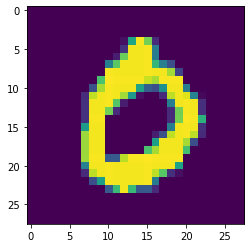

In [59]:
from pylab import imshow
x = x_test[3]
imshow(x)
x = x.reshape(1, 28, 28, 1).astype('float32') / 255
x = x.astype('float32')
model.predict(x)

This code excerpt from the `lenet-5.ipynb` notebook file displays an image from the test set and makes a prediction using the trained LeNet-5 model.

The `from pylab import imshow` statement imports the `imshow()` function from the `pylab` module, which is a part of the Matplotlib library for data visualization.

The `x_test[3]` statement selects the fourth image from the test set (Python uses 0-based indexing).

The `imshow(x)` statement displays the selected image using the `imshow()` function.

The `x.reshape(1, 28, 28, 1).astype('float32') / 255` statement reshapes the image to have a shape of `(1, 28, 28, 1)` and normalizes the pixel values to be between 0 and 1.

The `x.astype('float32')` statement converts the image to the `float32` data type, which is compatible with the TensorFlow library.

The `model.predict(x)` statement makes a prediction using the trained LeNet-5 model on the selected image. The output of the `predict()` method is a probability distribution over the classes in the MNIST dataset.


In [46]:
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
img = load_img("./test/3.png",target_size=(28,28))
img=img.convert("L")
img.save("./test/3_1.png")
x=img_to_array(img)
x=x.reshape(1, 28, 28, 1).astype('float32') / 255
x=x.astype('float32')
model.predict(x)

array([[1.7762419e-05, 1.7852648e-05, 7.3196162e-08, 1.5698429e-10,
        9.1076350e-01, 4.9194443e-07, 6.8887986e-02, 2.0302102e-02,
        1.0204633e-05, 1.4164810e-09]], dtype=float32)

This code excerpt loads an image file, preprocesses it, and makes a prediction using the trained LeNet-5 model.

The `from tensorflow.python.keras.preprocessing.image import load_img,img_to_array` statement imports the `load_img()` and `img_to_array()` functions from the `tensorflow.python.keras.preprocessing.image` module. These functions are used to load and preprocess the image.

The `load_img("./test/3.png",target_size=(28,28))` statement loads the image file located at `./test/3.png` and resizes it to have a shape of `(28, 28)`.

The `img=img.convert("L")` statement converts the image to grayscale.

The `img.save("./test/3_1.png")` statement saves the preprocessed image to a file named `3_1.png` in the `./test` directory.

The `img_to_array(img)` statement converts the preprocessed image to a Numpy array.

The `x.reshape(1, 28, 28, 1).astype('float32') / 255` statement reshapes the image to have a shape of `(1, 28, 28, 1)` and normalizes the pixel values to be between 0 and 1.

The `x.astype('float32')` statement converts the image to the `float32` data type, which is compatible with the TensorFlow library.

The `model.predict(x)` statement makes a prediction using the trained LeNet-5 model on the preprocessed image. The output of the `predict()` method is a probability distribution over the classes in the MNIST dataset.
